## General Resources

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

# Data visualization, exploratory and result analysis
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


In [2]:
distribution_line_color = sns.color_palette("dark:green")[2]
train_test_color = sns.color_palette('dark:#5A9_r', n_colors=3)

In [3]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

## Flipkart Products

xxxx

    Main Objective:
    Classify the penguins into their species (Adelie, Chinstrap, and Gentoo) based only on the culmen length and flipper length features. 

### Dataset

#### Import

In [4]:
def import_csv_dataset(file_path):
    df = pd.read_csv(file_path, header=0, encoding='latin-1')
    return df

In [5]:
flipkart_data = r"Dataset\flipkart_com-products.csv"
flipkart_data_df = import_csv_dataset(flipkart_data)

In [6]:
flipkart_id_name = flipkart_data_df[['pid', 'product_name']]
flipkart_id_image = flipkart_data_df[['pid', 'image']]
flipkart_id_spec_0 = flipkart_data_df[['pid', 'product_specifications']]

In [7]:
# Drop columns that may not be useful for the analysis
flipkart_data_df1 = flipkart_data_df.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'image', 'product_specifications'], axis=1)

In [8]:
# Expand the categories column into multiple columns
# Format is Main Categorry >> Sub Category 1 >> Sub Category 2 >> Sub Category 3

flipkart_data_df2 = flipkart_data_df1.copy()

# Split category tree
flipkart_data_df2['product_category_tree'] = flipkart_data_df2['product_category_tree'].str.split('>>')

# Remove leading `["` from first category
flipkart_data_df2['product_category_tree'] = flipkart_data_df2['product_category_tree'].apply(lambda x: [x[0].replace('["', '')] + x[1:] if x else x)

# Create a new dataframe with the expanded categories
flipkart_data_df_cat = flipkart_data_df2['product_category_tree'].apply(pd.Series)
flipkart_data_df_cat = flipkart_data_df_cat.rename(columns = lambda x : 'category_' + str(x))

# Merge the expanded categories with the original dataframe
flipkart_data_df2 = pd.concat([flipkart_data_df2, flipkart_data_df_cat], axis=1)
flipkart_data_df2 = flipkart_data_df2.drop(['product_category_tree'], axis=1)

# Drop categories other than category_0, category_1, and category_2
flipkart_data_df2 = flipkart_data_df2.drop(['category_3', 'category_4', 'category_5', 'category_6', 'category_7'], axis=1)

In [9]:
flipkart_data_df2

,pid,retail_price,discounted_price,is_FK_Advantage_product,description,product_rating,overall_rating,brand,category_0,category_1,category_2
0,SRTEH2FF9KEDEFGF,999.0,379.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
1,SBEEH3QGU7MFYJFY,32157.0,22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,Furniture,Living Room Furniture,Sofa Beds & Futons
2,SHOEH4GRSUBJGZXE,999.0,499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,Footwear,Women's Footwear,Ballerinas
3,SRTEH2F6HUZMQ6SJ,699.0,267.0,False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
4,PSOEH3ZYDMSYARJ5,220.0,210.0,False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,Pet Supplies,Grooming,Skin & Coat Care
...,...,...,...,...,...,...,...,...,...,...,...
19995,STIE7KFJAKSTDY9G,1500.0,730.0,False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,Baby Care,Baby & Kids Gifts,Stickers
19996,STIE9F5URNQGJCGH,1429.0,1143.0,False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers
19997,STIE7VAYDKQZEBSD,1299.0,999.0,False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers
19998,STIE8YSVEPPCZ42Y,1499.0,1199.0,False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers


#### Exploratory Analysis

In [10]:
flipkart_data_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pid                      20000 non-null  object 
 1   retail_price             19922 non-null  float64
 2   discounted_price         19922 non-null  float64
 3   is_FK_Advantage_product  20000 non-null  bool   
 4   description              19998 non-null  object 
 5   product_rating           20000 non-null  object 
 6   overall_rating           20000 non-null  object 
 7   brand                    14136 non-null  object 
 8   category_0               20000 non-null  object 
 9   category_1               19672 non-null  object 
 10  category_2               18543 non-null  object 
dtypes: bool(1), float64(2), object(8)
memory usage: 1.5+ MB


In [11]:
flipkart_data_df2.isna().sum()

pid                           0
retail_price                 78
discounted_price             78
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
category_0                    0
category_1                  328
category_2                 1457
dtype: int64

In [12]:
flipkart_data_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_price,19922.0,2979.206104,9009.639341,35.0,666.0,1040.0,1999.0,571230.0
discounted_price,19922.0,1973.401767,7333.586040,35.0,350.0,550.0,999.0,571230.0


#### Visualization

In [13]:
column_list = flipkart_data_df2.columns.tolist()
column_list

['pid',
 'retail_price',
 'discounted_price',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'category_0',
 'category_1',
 'category_2']

In [14]:
# Create a dataframe of unique brands and sort their counts from highest to lowest
category_counts = flipkart_data_df2['category_0'].value_counts()
category_counts = category_counts.reset_index()
category_counts.columns = ['category_0', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

category_counts.head(30)

,category_0,count
0,Clothing,6198
1,Jewellery,3531
2,Footwear,1227
3,Mobiles & Accessories,1099
4,Automotive,1012
5,Home Decor & Festive Needs,929
6,Beauty and Personal Care,710
7,Home Furnishing,700
8,Kitchen & Dining,647
9,Computers,578


In [15]:
def plot_count(df, column):
    list = df[column].value_counts()
    plt.figure(figsize=(5, 3))
    sns.barplot(x=list.index, y=list.values, palette='dark:#5A9_r')
    plt.show()

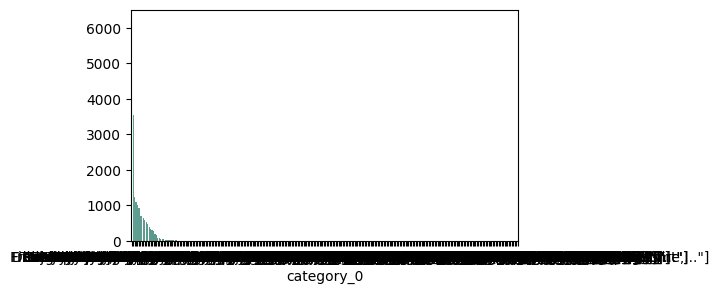

In [17]:
plot_count(flipkart_data_df2, 'category_0')

In [18]:
# Create a dataframe of unique brands and sort their counts from highest to lowest
blank_retail_prices = flipkart_data_df2[flipkart_data_df2['retail_price'].isna()]
blank_retail_prices = blank_retail_prices['category_0'].value_counts().reset_index()
blank_retail_prices.columns = ['category_0', 'count']
blank_retail_prices = blank_retail_prices.sort_values(by='count', ascending=False)

blank_retail_prices

,category_0,count
0,Clothing,27
1,Cameras & Accessories,10
2,Jewellery,9
3,Computers,5
4,Tools & Hardware,4
9,Automotive,2
12,Watches,2
11,Home Improvement,2
10,Home Decor & Festive Needs,2
8,Footwear,2


In [21]:
# category_0 are too specific and unique, change to common ones

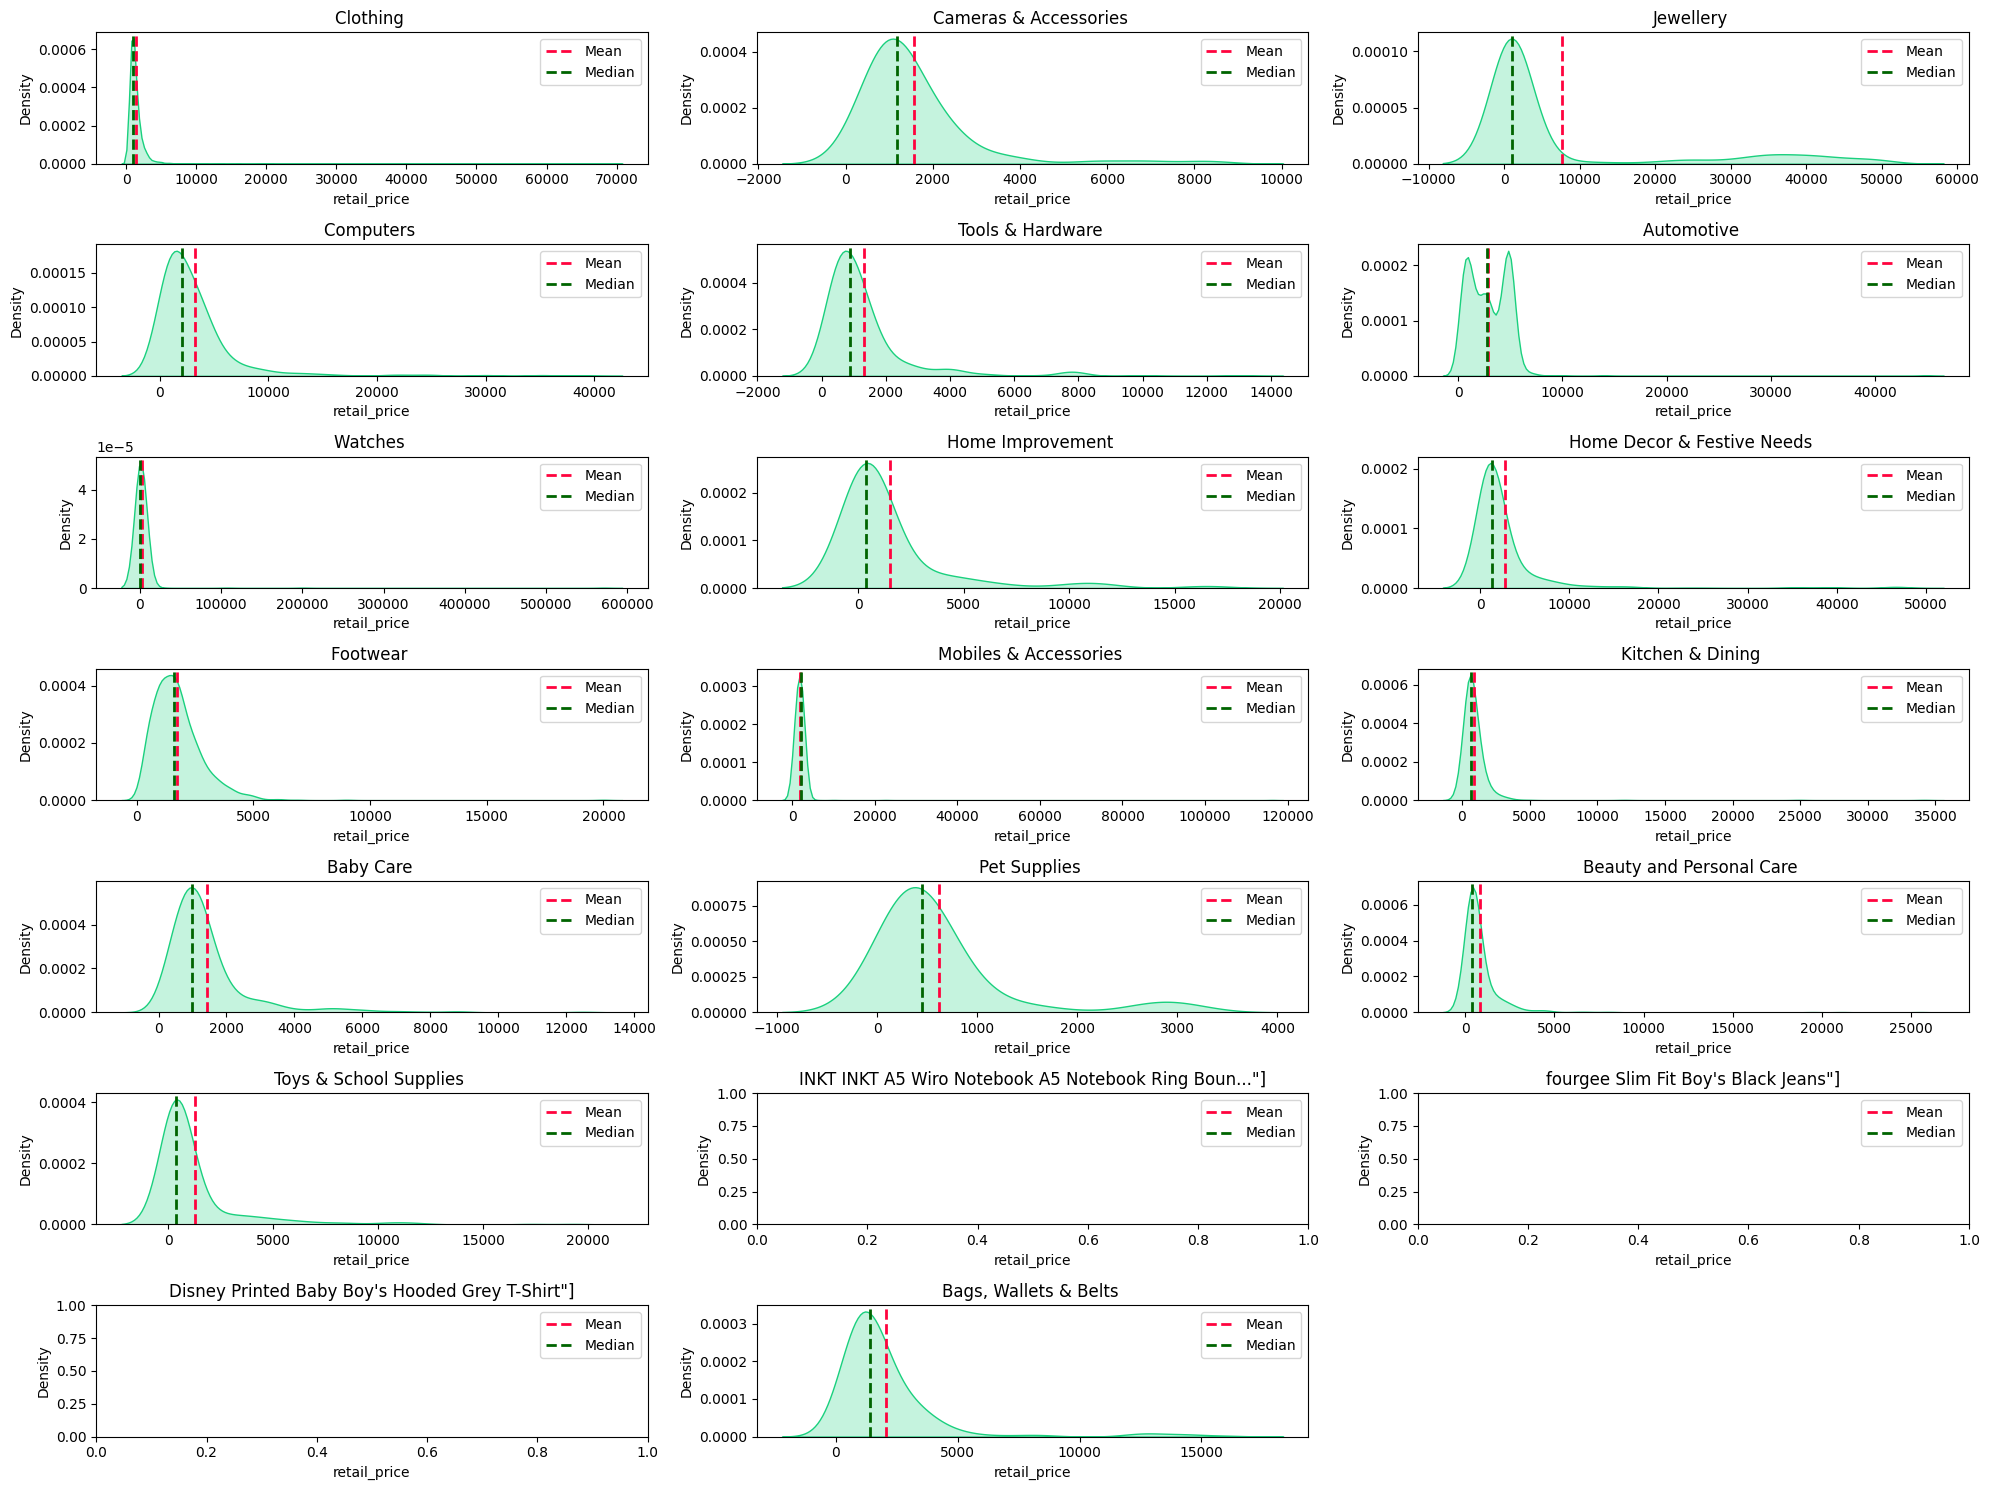

In [19]:
filtered_df_for_retail = flipkart_data_df2[flipkart_data_df2['category_0'].isin(blank_retail_prices['category_0'])]

# Set up the plot grid
fig = plt.figure(figsize=(20, 15))

# Define the color for the KDE lines
distribution_line_color = "#1AD07E"

# Calculate the number of rows and columns for subplots
num_categories = len(blank_retail_prices['category_0'])
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

# Loop through each category and plot the KDE
for index, category in enumerate(blank_retail_prices['category_0']):
    category_data = filtered_df_for_retail[filtered_df_for_retail['category_0'] == category]['retail_price']
    
    # Skip categories with insufficient data
    if category_data.empty:
        continue

    plt.subplot(num_rows, num_cols, index + 1)
    sns.kdeplot(category_data, color=distribution_line_color, fill=True)
    
    # Plot Mean & Median
    plt.axvline(category_data.mean(), color='#ff033e', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(category_data.median(), color='darkgreen', linestyle='dashed', linewidth=2, label='Median')
    
    plt.title(f'{category}')
    plt.legend()
    plt.tight_layout()

plt.show()

In [20]:
# Define the category updates
category_updates = {
    16: "Toys & School Supplies ",
    17: "Clothing ",
    18: "Clothing "
}

# Get the old category values before updating blank_retail_prices
old_categories = {idx: blank_retail_prices.at[idx, 'category_0'] for idx in category_updates.keys() if idx in blank_retail_prices.index}

# Update flipkart_df: Replace old categories with new ones
for idx, old_category in old_categories.items():
    new_category = category_updates[idx]
    flipkart_data_df2.loc[flipkart_data_df2['category_0'] == old_category, 'category_0'] = new_category

In [21]:
# Compute median prices for each category in flipkart_df
median_prices = flipkart_data_df2.groupby('category_0')[['retail_price', 'discounted_price']].median()

# Function to fill NaN values based on median prices
def fill_median(row):
    category = row['category_0']
    if pd.isna(row['retail_price']) and category in median_prices.index:
        row['retail_price'] = median_prices.loc[category, 'retail_price']
    if pd.isna(row['discounted_price']) and category in median_prices.index:
        row['discounted_price'] = median_prices.loc[category, 'discounted_price']
    return row

# Apply the function to fill missing values
flipkart_data_df3 = flipkart_data_df2 .apply(fill_median, axis=1)

In [22]:
# show rows with missing description
flipkart_data_df3[flipkart_data_df3['description'].isna()]

,pid,retail_price,discounted_price,is_FK_Advantage_product,description,product_rating,overall_rating,brand,category_0,category_1,category_2
553,TOPEYV38KYVJKM54,1290.0,645.0,False,NaN,No rating available,No rating available,NaN,Clothing,Women's Clothing,Western Wear
17299,CPCE2ZME2P7BMJFB,499.0,299.0,False,NaN,No rating available,No rating available,Amore,Home Furnishing,"Cushions, Pillows & Covers","Cushion Covers""]"


In [23]:
# check row 553 in flipkart_id_spec_0
flipkart_id_spec_0.iloc[553]

pid                                                        TOPEYV38KYVJKM54
product_specifications    {"product_specification"=>[{"key"=>"Ideal For"...
Name: 553, dtype: object

In [24]:
flipkart_data_df3.loc[
    flipkart_data_df3['description'].isna(), 'description'
] = flipkart_id_spec_0['product_specifications']


In [25]:
# replace all rows with missing values in "brand" with "Unknown"
flipkart_data_df3.loc[
    flipkart_data_df3['brand'].isna(), 'brand'
] = 'Unknown'

In [26]:
flipkart_data_df3.isna().sum()

pid                           0
retail_price                  0
discounted_price              0
is_FK_Advantage_product       0
description                   0
product_rating                0
overall_rating                0
brand                         0
category_0                    0
category_1                  328
category_2                 1457
dtype: int64

## Recommendation System

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
def preprocess_text(text):
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) - {"not", "no"}  # Keep negations
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove special characters and digits but keep words
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Lemmatization (optional)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

In [29]:
# Apply preprocessing
flipkart_data_df3['description'] = flipkart_data_df3['description'].fillna('').apply(preprocess_text)


In [30]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(flipkart_data_df3['description'])

print(tfidf_matrix.shape)

(20000, 23127)


In [31]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

print(cosine_sim.shape)
cosine_sim[1]

(20000, 20000)


array([0.02919115, 1.        , 0.1271327 , ..., 0.01248895, 0.01248895,
       0.01248895])

In [32]:
# Save cosine_sim to disk
import pickle

with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)
    

In [ ]:
# indices = pd.Series(flipkart_data_df3.index, index=flipkart_data_df3['pid'])

In [36]:
flipkart_id_name

,pid,product_name
0,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts
1,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed
2,SHOEH4GRSUBJGZXE,AW Bellies
3,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts
4,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo
...,...,...
19995,STIE7KFJAKSTDY9G,WallDesign Small Vinyl Sticker
19996,STIE9F5URNQGJCGH,Wallmantra Large Vinyl Stickers Sticker
19997,STIE7VAYDKQZEBSD,Elite Collection Medium Acrylic Sticker
19998,STIE8YSVEPPCZ42Y,Elite Collection Medium Acrylic Sticker


In [37]:
def get_top_5_similar(index, df, df_name, cosine_sim):
    # Get the PID of the given index
    pid = df.loc[index, 'pid']
    
    # Get the product name from flipkart_id_name using pid
    product_name = df_name.loc[df_name['pid'] == pid, 'product_name'].values[0]
    
    # Get similarity scores for the given index and sort them in descending order
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]  # Exclude itself
    
    # Get the top 5 similar product indices
    top_indices = [i[0] for i in sim_scores]

    # Get corresponding product IDs and names
    top_pids = df.loc[top_indices, 'pid'].values
    top_names = df_name.loc[df_name['pid'].isin(top_pids), 'product_name'].values

    # Print results
    print(f"Product ID: {pid}")
    print(f"Product Name: {product_name}")
    for i, (top_pid, top_name) in enumerate(zip(top_pids, top_names), start=1):
        print(f"Top {i}: {top_pid} - {top_name}")

    return pid, product_name, top_pids, top_names

In [38]:
# Import the cosine similarity matrix
cosine_sim_path = r"cosine_sim.pkl"

with open(cosine_sim_path, 'rb') as f:
    cosine_sim = pickle.load(f)

In [45]:
flipkart_id_name

,pid,product_name
0,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts
1,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed
2,SHOEH4GRSUBJGZXE,AW Bellies
3,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts
4,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo
...,...,...
19995,STIE7KFJAKSTDY9G,WallDesign Small Vinyl Sticker
19996,STIE9F5URNQGJCGH,Wallmantra Large Vinyl Stickers Sticker
19997,STIE7VAYDKQZEBSD,Elite Collection Medium Acrylic Sticker
19998,STIE8YSVEPPCZ42Y,Elite Collection Medium Acrylic Sticker


In [44]:
pid, product_name, top_pids, top_names = get_top_5_similar(1500, flipkart_data_df3, flipkart_id_name, cosine_sim)

Product ID: CAYEJFYZ6B73NUMH
Product Name: ARIHANT Multicolor Rod Rail Bracket
Top 1: ACCE6J23PMCFS9ST - Addyz 5 Rods Bangle Earring Ring Jewellery Vanity Case
Top 2: CRNEGE2TRGCGCD6J - KolorFish Flip Cover for iPad Mini
Top 3: CRNEGE2TQ7EBFE4Z - Fiesta 360 Degree Spin Mobile Phone Holder Bracket
Top 4: VANE8QPQZFRE6XVN - Aroma Comfort Polyester Multi Color Striped Rod pocket Long Door Curtain
Top 5: ACCDRFVG52PHVRSK - Aroma Comfort Polyester Multi Color Striped Rod pocket Door Curtain


In [49]:
flipkart_data_df3

,pid,retail_price,discounted_price,is_FK_Advantage_product,description,product_rating,overall_rating,brand,category_0,category_1,category_2
0,SRTEH2FF9KEDEFGF,999.0,379.0,False,key feature alisha solid womens cycling short ...,No rating available,No rating available,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
1,SBEEH3QGU7MFYJFY,32157.0,22646.0,False,fabhomedecor fabric double sofa bed finish col...,No rating available,No rating available,FabHomeDecor,Furniture,Living Room Furniture,Sofa Beds & Futons
2,SHOEH4GRSUBJGZXE,999.0,499.0,False,key feature aw belly sandal wedge heel casuals...,No rating available,No rating available,AW,Footwear,Women's Footwear,Ballerinas
3,SRTEH2F6HUZMQ6SJ,699.0,267.0,False,key feature alisha solid womens cycling short ...,No rating available,No rating available,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
4,PSOEH3ZYDMSYARJ5,220.0,210.0,False,specification sicons purpose arnica dog shampo...,No rating available,No rating available,Sicons,Pet Supplies,Grooming,Skin & Coat Care
...,...,...,...,...,...,...,...,...,...,...,...
19995,STIE7KFJAKSTDY9G,1500.0,730.0,False,buy walldesign small vinyl sticker r online wa...,No rating available,No rating available,WallDesign,Baby Care,Baby & Kids Gifts,Stickers
19996,STIE9F5URNQGJCGH,1429.0,1143.0,False,buy wallmantra large vinyl sticker sticker r o...,No rating available,No rating available,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers
19997,STIE7VAYDKQZEBSD,1299.0,999.0,False,buy elite collection medium acrylic sticker r ...,No rating available,No rating available,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers
19998,STIE8YSVEPPCZ42Y,1499.0,1199.0,False,buy elite collection medium acrylic sticker r ...,No rating available,No rating available,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers


In [ ]:
# # Save flipkart_data_df3 to disk
# flipkart_data_df3.to_csv('flipkart_data_df3.csv', header=True, index=False)


In [56]:
selected_pid = 'SBEEH3QGU7MFYJFY'
print("Selected PID:", selected_pid)
selected_index = flipkart_data_df3[flipkart_data_df3["pid"] == selected_pid].index[0]
print("Selected Index:", selected_index)

Selected PID: SBEEH3QGU7MFYJFY
Selected Index: 1
